In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect



In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results




inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])






id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

#last date
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()

last_date

('2017-08-23')

In [12]:
#date 1 year ago from last date
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [13]:
#from sqlalchemy import between
#sel =[measurement.id, measurement.station, measurement.date, measurement.prcp]



#qry = session.query(measurement.date).filter(measurement.date <= '2016-08-2').\
        #filter(measurement.date >= '2017-08-23').all()
#retieving both columns as tuples
daterange = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date.between('2016-08-23', '2017-08-23')).all()



In [14]:
#saving both 'date' and 'precipitation' columns in lists
date_list = []
prcp_list=[]
for x in daterange:
   date_list.append(x[0])
   prcp_list.append(x[1])
   


date_list


['2016-08-23',
 '2016-08-24',
 '2016-08-25',
 '2016-08-26',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-05',
 '2016-09-06',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-10',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-17',
 '2016-09-18',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-24',
 '2016-09-25',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-01',
 '2016-10-02',
 '2016-10-03',
 '2016-10-04',
 '2016-10-05',
 '2016-10-06',
 '2016-10-07',
 '2016-10-08',
 '2016-10-09',
 '2016-10-10',
 '2016-10-11',
 '2016-10-12',
 '2016-10-13',
 '2016-10-14',
 '2016-10-15',
 '2016-10-16',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-20',
 '2016-10-21',
 '2016-10-22',
 '2016-10-23',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26',
 '2016-10-27',
 '2016-10-

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

dateprcp_df = pd.DataFrame(
    {"Date": date_list,
     "Precipitation": prcp_list
     }
)

setindex=dateprcp_df.set_index('Date')

setindex


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [16]:
# Sort the dataframe by date


setindex.sort_index(axis = 0) 

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


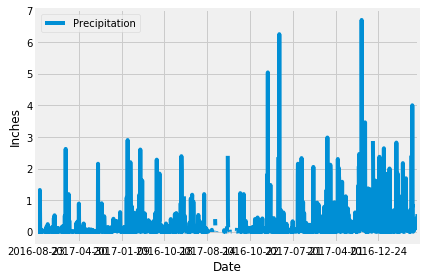

In [41]:
setindex.plot()
plt.xlabel("Date")
plt.ylabel("Inches")


plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
setindex.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(measurement).group_by(measurement.station).count()
print(stations)


9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

import operator

stationsactive = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()

stationsactive.sort(key = operator.itemgetter(1), reverse = True)
stationsactive



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the station id from the previous query:


#calculate the lowest temperature recorded of most active station

mintemp= session.query(func.min(measurement.tobs)).filter_by(station="USC00519281").scalar()

mintemp

54.0

In [22]:
# highest temperature recorded of most active station
maxtemp= session.query(func.max(measurement.tobs)).filter_by(station="USC00519281").scalar()

maxtemp

85.0

In [23]:
# average temperature of the most active station
avgtemp=session.query(func.avg(measurement.tobs)).filter_by(station="USC00519281").scalar()

avgtemp

71.66378066378067

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#get last date
stationdate= session.query(measurement.date).filter_by(station="USC00519281").all()

print(stationdate[-1])


('2017-08-18',)


In [25]:
#get date one year before
query_date2 = dt.date(2017,8,18) - dt.timedelta(days=365)
print("Query Date: ", query_date2)

Query Date:  2016-08-18


In [26]:
stationrange = session.query(measurement.tobs).\
            filter(measurement.date.between('2016-08-18', '2017-08-18')).filter_by(station="USC00519281").all()


#convert tuple list into list for histogram

stationrange_list= []

for x in stationrange:
   stationrange_list.append(x[0])



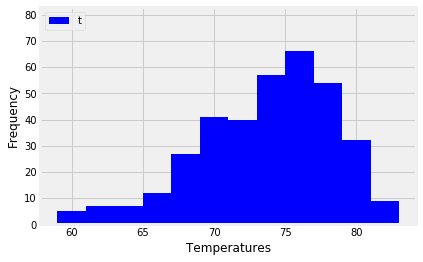

<Figure size 432x288 with 0 Axes>

In [27]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


plt.hist(stationrange_list, bins = 12, facecolor="blue")

plt.ylim(0, max(stationrange_list))


plt.xlabel("Temperatures")
plt.ylabel("Frequency")
plt.legend("tobs", loc="upper left")

plt.show()
plt.tight_layout()

## Bonus Challenge Assignment

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
